In [1]:
import sys
sys.path.append('../src')

from m4_generator import M4Generator
from error_functions import *
from visualization import *
from evaluation import evaluate_model
from m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


In [9]:
EPOCHS = 50
BATCH_SIZE = 100
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 50
LOSS = smapetf

model_name = f'LSTM_E{EPOCHS}_B{BATCH_SIZE}_H{HIDDEN_LAYER_SIZE}_L{LOOKBACK}_ERR(smapetf)'

print(model_name)

gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON, BATCH_SIZE)

model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        horizon=HORIZON, learning_rate=0.01, loss = LOSS)

hist = model.train(gen, epochs=EPOCHS)

#model.save(f'../models/{model_name}.json', f'../models/{model_name}.h5')

LSTM_E50_B100_H50_L48_ERR(smapetf)
Epoch 1/50
68/68 [==============================] - 8s 120ms/step - loss: 154.5748
Epoch 2/50
68/68 [==============================] - 8s 112ms/step - loss: 120.7376
Epoch 3/50
68/68 [==============================] - 8s 112ms/step - loss: 98.1746
Epoch 4/50
68/68 [==============================] - 8s 114ms/step - loss: 75.0801
Epoch 5/50
68/68 [==============================] - 8s 120ms/step - loss: 59.9615
Epoch 6/50
68/68 [==============================] - 8s 121ms/step - loss: 54.7923
Epoch 7/50
68/68 [==============================] - 8s 113ms/step - loss: 51.3408
Epoch 8/50
68/68 [==============================] - 8s 115ms/step - loss: 46.8355
Epoch 9/50
68/68 [==============================] - 8s 113ms/step - loss: 46.6940
Epoch 10/50
68/68 [==============================] - 8s 115ms/step - loss: 45.6403
Epoch 11/50
68/68 [==============================] - 8s 122ms/step - loss: 43.1357
Epoch 12/50
68/68 [==============================] - 8s 114

In [3]:
model.save(f'../models/{model_name}.json', f'../models/{model_name}.h5')

Saved model to disk


In [4]:
#=================== Evaluate Model
BATCH_SIZE = 50
LOOKBACK = 48
HORIZON = 48

gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON, BATCH_SIZE)

model = M4Model(batch_size=BATCH_SIZE)
model.load('../models/LSTM_E50_B50_H100_L48_ERR(smapetf).json','../models/LSTM_E50_B50_H100_L48_ERR(smapetf).h5')

train_x, train_y, test_x, test_y = gen.get_data()

train_error = evaluate_model(model, train_x, train_y, smapetf)
print(train_error)

test_error = evaluate_model(model, test_x, test_y, smapetf)
print(test_error)


Loaded model from disk
10.902082468012248
26.22091066953754


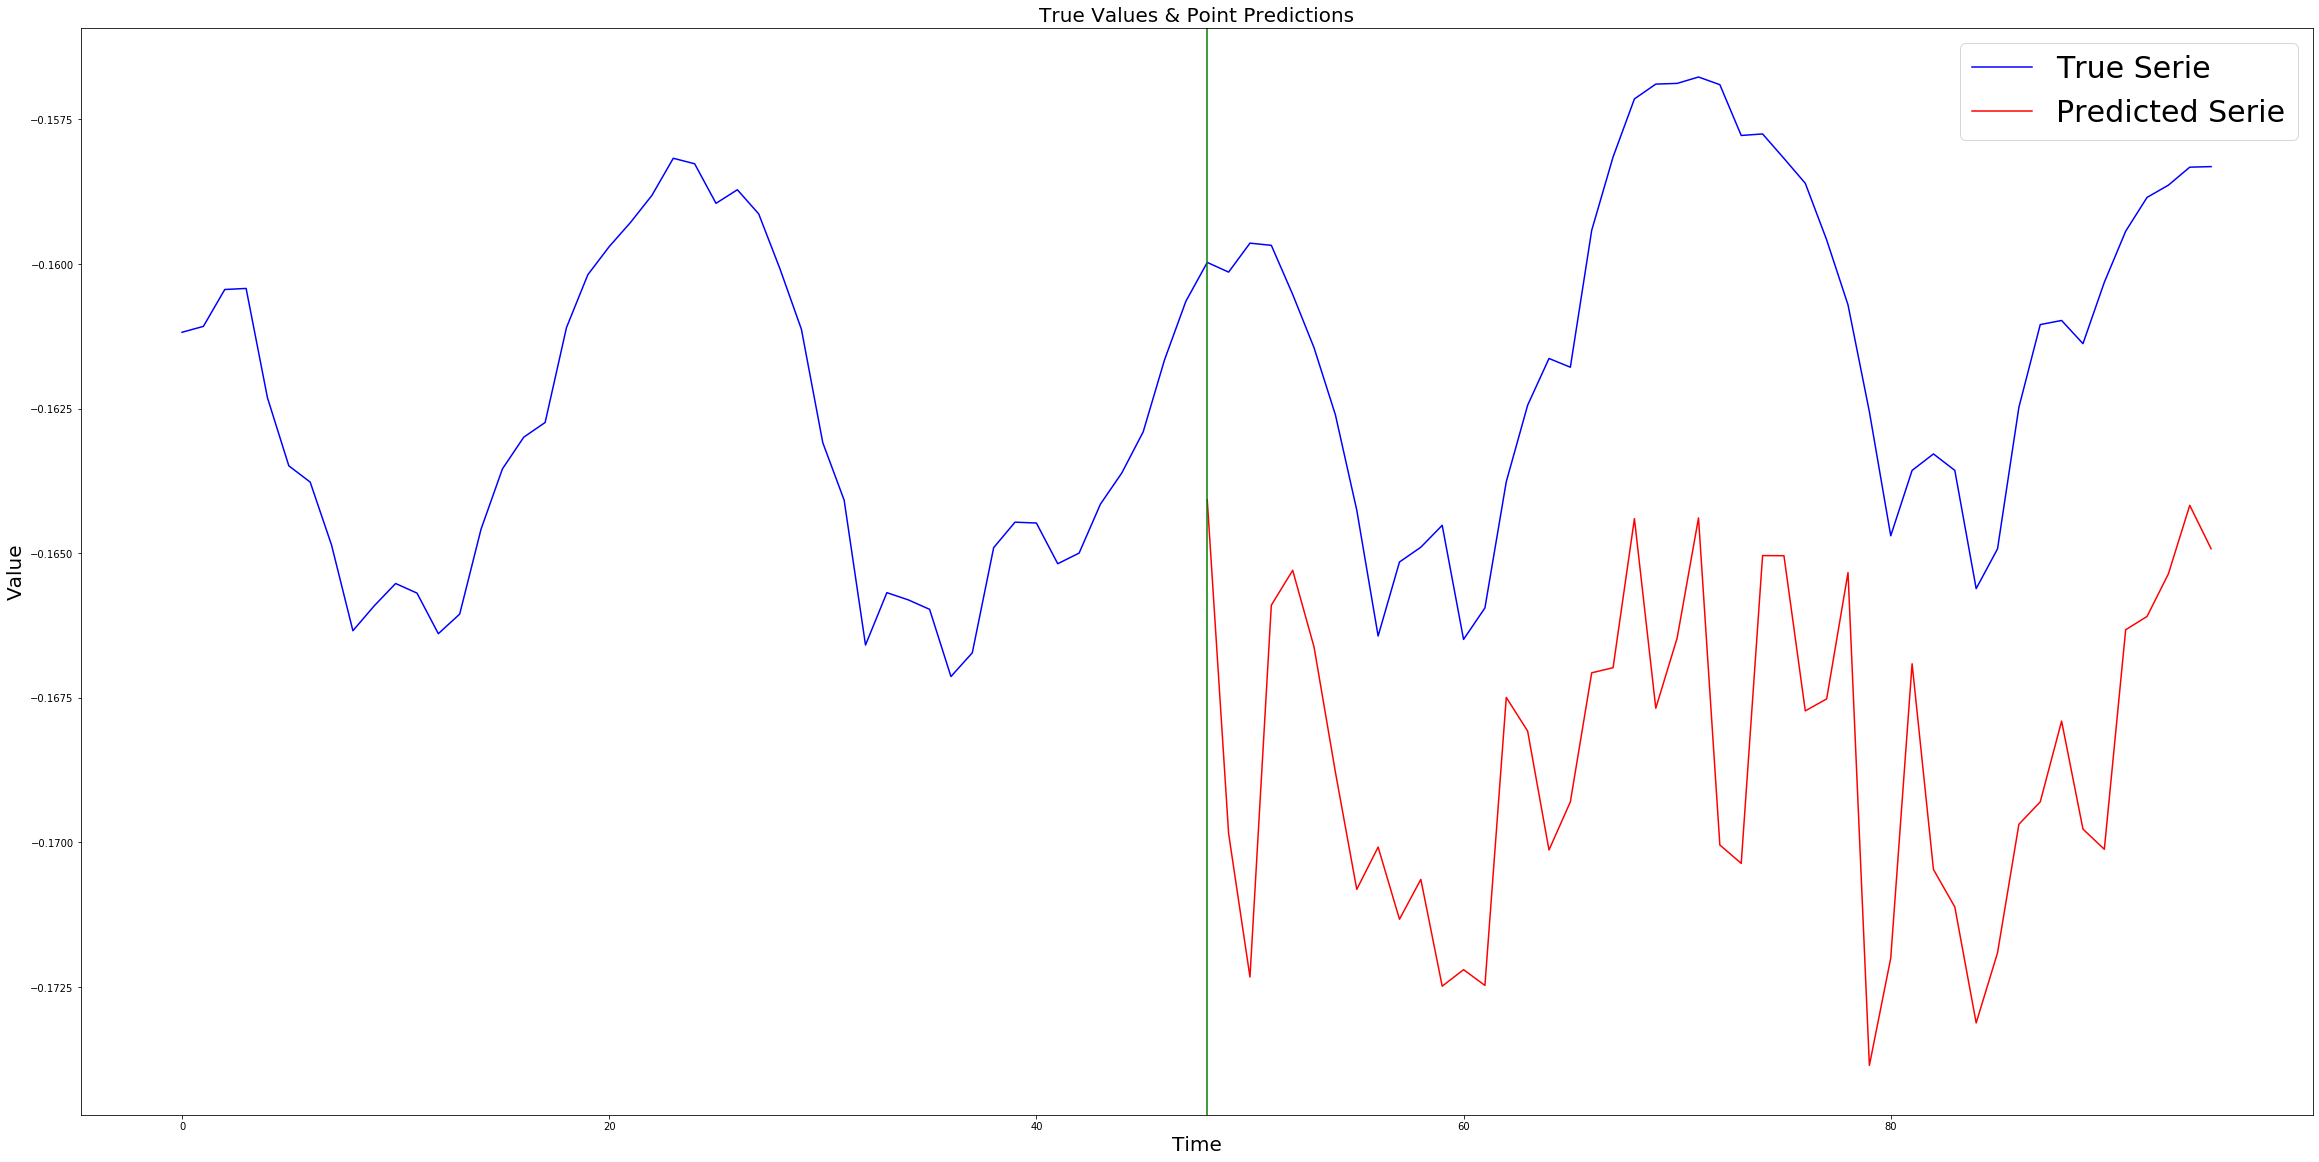

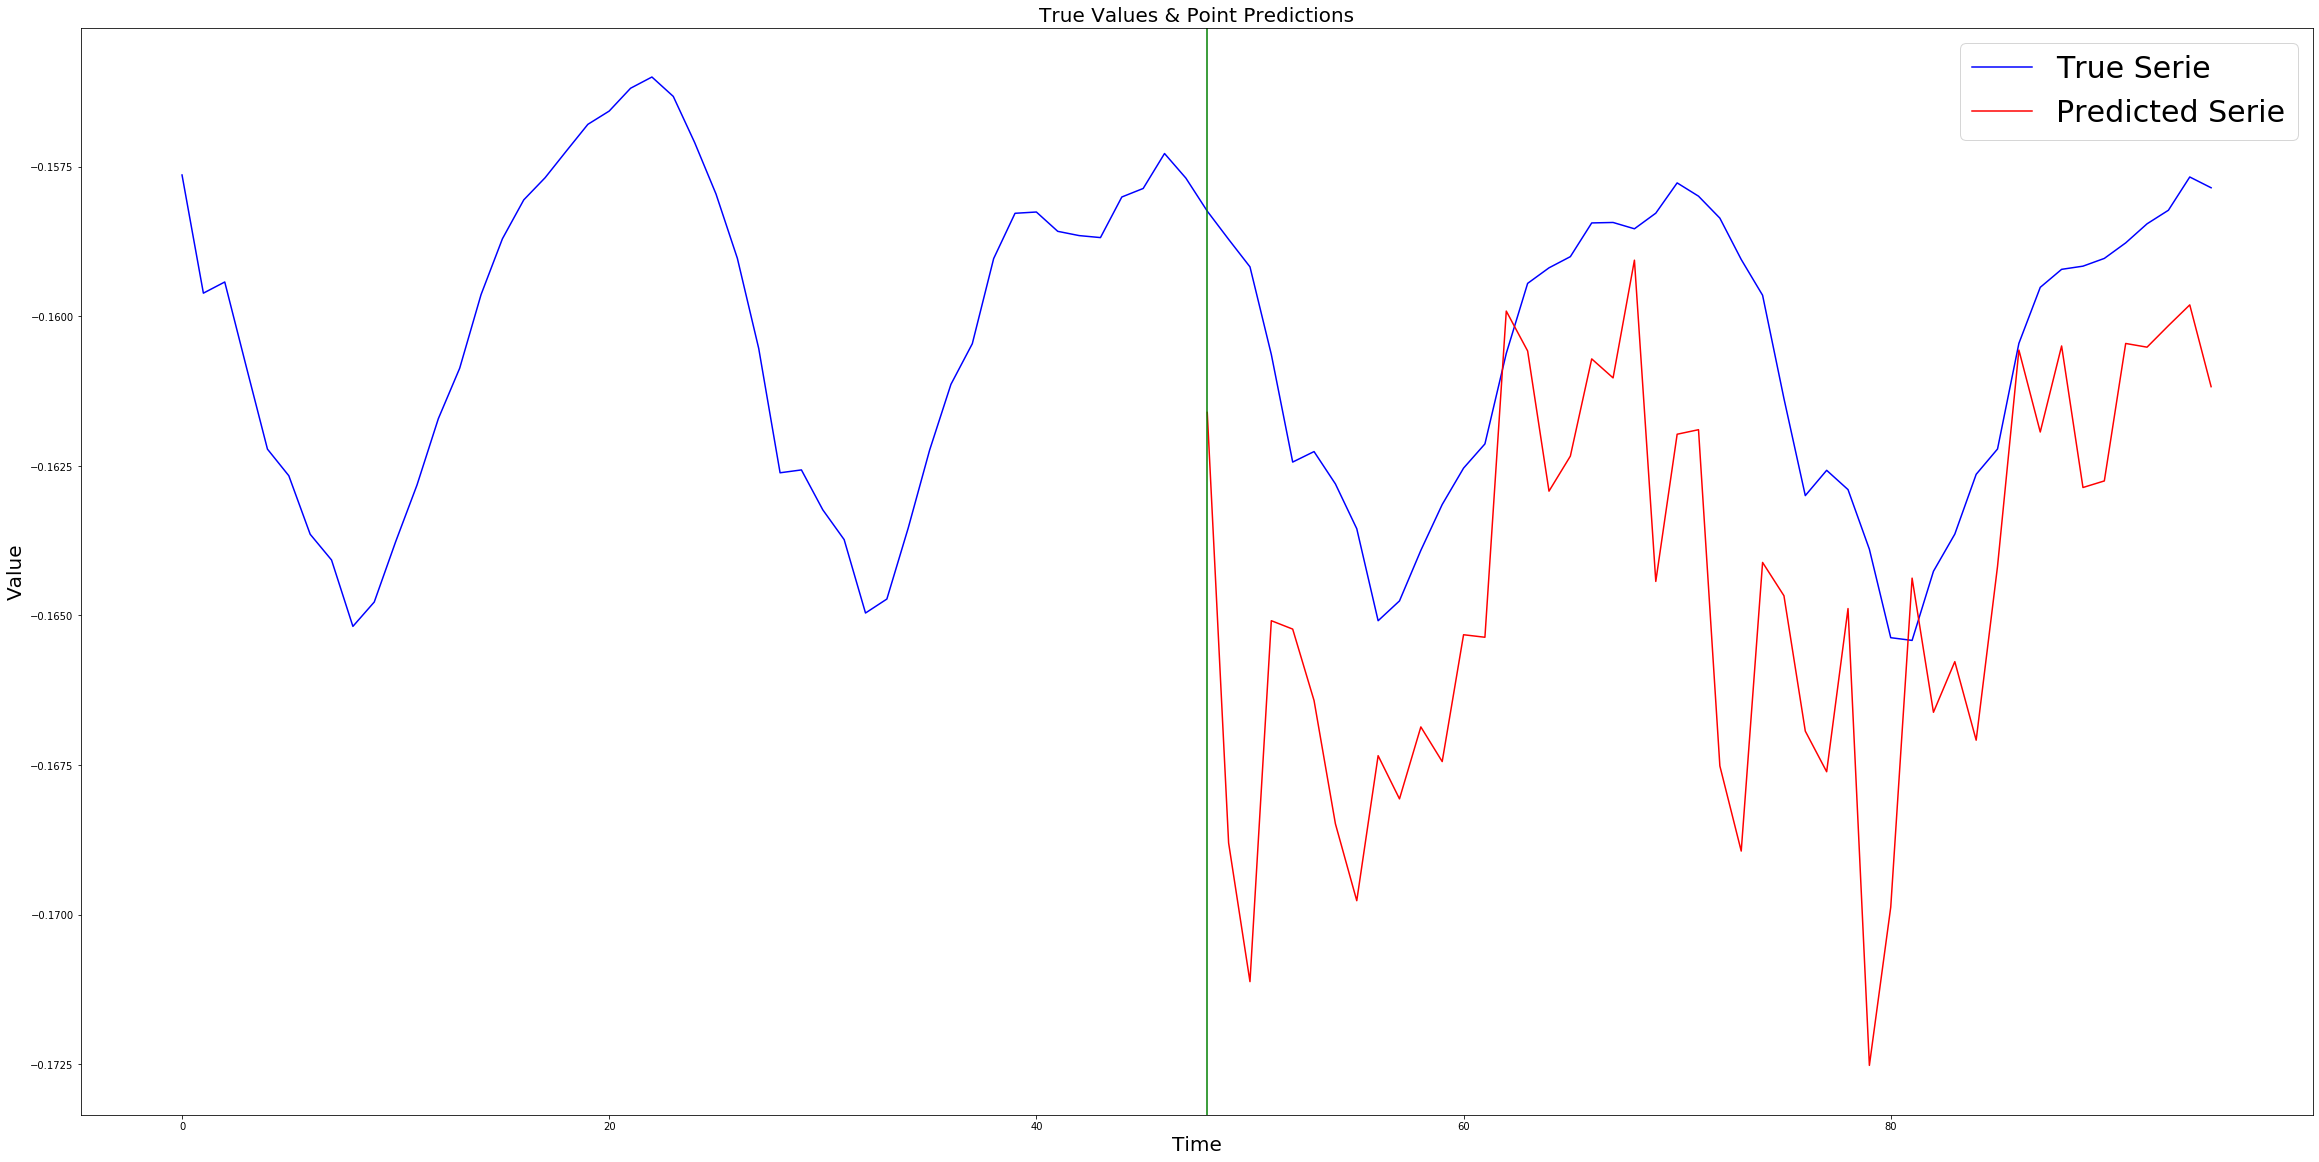

In [6]:
train_x, train_y, test_x, test_y = gen.get_data()
IDX = 0
#============ Predict Train
predictedY = model.predict(train_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(train_x, train_y, predictedY, series_num=10)
plot_serie_and_prediction(train_x, train_y, predictedY, serie_indx=IDX)

#============ Predict Test
predictedY = model.predict(test_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(test_x, test_y, predictedY, serie_indx=IDX)

In [ ]:
#=================== Evaluate Model
train_x, train_y, test_x, test_y = gen.get_data()

train_error = evaluate_model(model, train_x, train_y, smapetf)
test_error = evaluate_model(model, test_x, test_y, smapetf)

with open(f'models/{model_name}.txt', 'a') as file:
    file.write(f'Training Error: {train_error}\n')
    file.write(f'Test Error: {test_error}')